In [2]:
#Imports and settings

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
import tensorflow_addons as tfa
from tqdm.notebook import tqdm


from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

/opt/conda/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/opt/conda/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're usin

In [3]:
print('tf version: ', tf.__version__)

tf version:  2.8.0


In [4]:
# load the features and labels (subtract 1 as the labels aren't indexed from 0)
ytest = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/y_test.txt')-1
ytrain = np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/y_train.txt')-1

In [5]:
# load the x,y,z body accelerations test data
xx_test=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_x_test.txt')
yy_test=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_y_test.txt')
zz_test=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/test/Inertial Signals/body_acc_z_test.txt')
# concatenate the arrays along the last dimension
xtest = np.concatenate((xx_test[:,:,None],yy_test[:,:,None],zz_test[:,:,None]),axis=2)
# (using None here adds an extra dimension of size 1 to the end of the array)

In [7]:
# follow the same approach for the train data
xx_train=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_x_train.txt')
yy_train=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_y_train.txt')
zz_train=np.loadtxt('/home/jovyan/datasets/UCI_HAR_DATASET/train/Inertial Signals/body_acc_z_train.txt')
xtrain = np.concatenate((xx_train[:,:,None],yy_train[:,:,None],zz_train[:,:,None]),axis=2)

In [8]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7352, 128, 3)
(2947, 128, 3)
(7352,)
(2947,)


plot one example data sample from
each of the body_acc_x_test, body_acc_y_test, and body_acc_z_test files for each of walking, sitting, standing, and
laying

In [9]:
# ytest[112]

In [10]:
# ytrain.shape

(7352,)

In [11]:
# xtest.shape[1]

128

In [12]:
# ytest[1]   # this is 4 so sitting

4.0

In [15]:
# xtest

array([[[ 0.01165315, -0.02939904,  0.1068262 ],
        [ 0.01310909, -0.03972867,  0.1524549 ],
        [ 0.01126885, -0.05240586,  0.2168462 ],
        ...,
        [ 0.00129151,  0.01173502,  0.00366559],
        [ 0.00147   ,  0.00951741,  0.00404194],
        [ 0.00257384,  0.00730507,  0.00488844]],

       [[ 0.00927963,  0.00665052, -0.02631933],
        [ 0.00492971,  0.01864973, -0.02688753],
        [ 0.0039536 ,  0.0155395 , -0.03663861],
        ...,
        [ 0.0077876 ,  0.00473062,  0.01412899],
        [ 0.00343349, -0.00461985,  0.00133805],
        [-0.00123868, -0.01322889, -0.01703861]],

       [[ 0.00573194,  0.00730484,  0.01021286],
        [ 0.00706565,  0.00733091,  0.01341419],
        [ 0.00510976,  0.00715346,  0.00364656],
        ...,
        [-0.00074285, -0.00962914, -0.00250092],
        [-0.00192336, -0.00642597, -0.00252495],
        [-0.00430462, -0.00793205, -0.00314011]],

       ...,

       [[-0.1476465 ,  0.00551979,  0.01025031],
        [-0

In [16]:
# xtest[1, :, 0]  # matrix 1, all rows, col 0 corresponds to body_acc_x_test

array([ 0.00927963,  0.00492971,  0.0039536 ,  0.00921443,  0.01615613,
        0.0140794 ,  0.01310521,  0.02124696,  0.02682344,  0.03105437,
        0.03788606,  0.02646287, -0.02144115, -0.06056795, -0.02472538,
        0.02027213, -0.00193409, -0.00890671,  0.00953767, -0.00433166,
       -0.00186384,  0.00495507, -0.00533614,  0.00200079, -0.00170752,
       -0.0064635 ,  0.00020412, -0.00364001,  0.00008268, -0.00144162,
       -0.00595939,  0.00034399,  0.000558  ,  0.00238143,  0.00182778,
       -0.00145607, -0.00020006, -0.00057041,  0.00260494,  0.00264362,
        0.00159703,  0.00381778,  0.00164798,  0.00294322,  0.00558164,
        0.0062567 ,  0.00516898, -0.00252123, -0.00636261, -0.00249661,
        0.00245527,  0.00442356,  0.00211023, -0.00055879, -0.00294425,
       -0.0012469 ,  0.00284826,  0.00235456,  0.00272098,  0.00325529,
        0.00130108,  0.00129151,  0.00147   ,  0.00257384,  0.00573194,
        0.00706565,  0.00510976,  0.00243396,  0.00202394,  0.00

In [17]:
#Set the labels (subtract 1 from original labels)
WALKING=0
WALKING_UPSTAIRS=1
WALKING_DOWNSTAIRS=2
SITTING=3
STANDING=4
LAYING=5

In [18]:
#Select random sample from activity
random_ts_walking = np.random.choice(np.where(ytest==WALKING)[0])
random_ts_sitting = np.random.choice(np.where(ytest==SITTING)[0])
random_ts_standing = np.random.choice(np.where(ytest==STANDING)[0])
random_ts_laying = np.random.choice(np.where(ytest==LAYING)[0])

In [16]:
num = [0,1,2,3]
samples = [random_ts_walking, random_ts_sitting, random_ts_standing, random_ts_laying]
activity = ['walking', 'sitting', 'standing', 'laying']

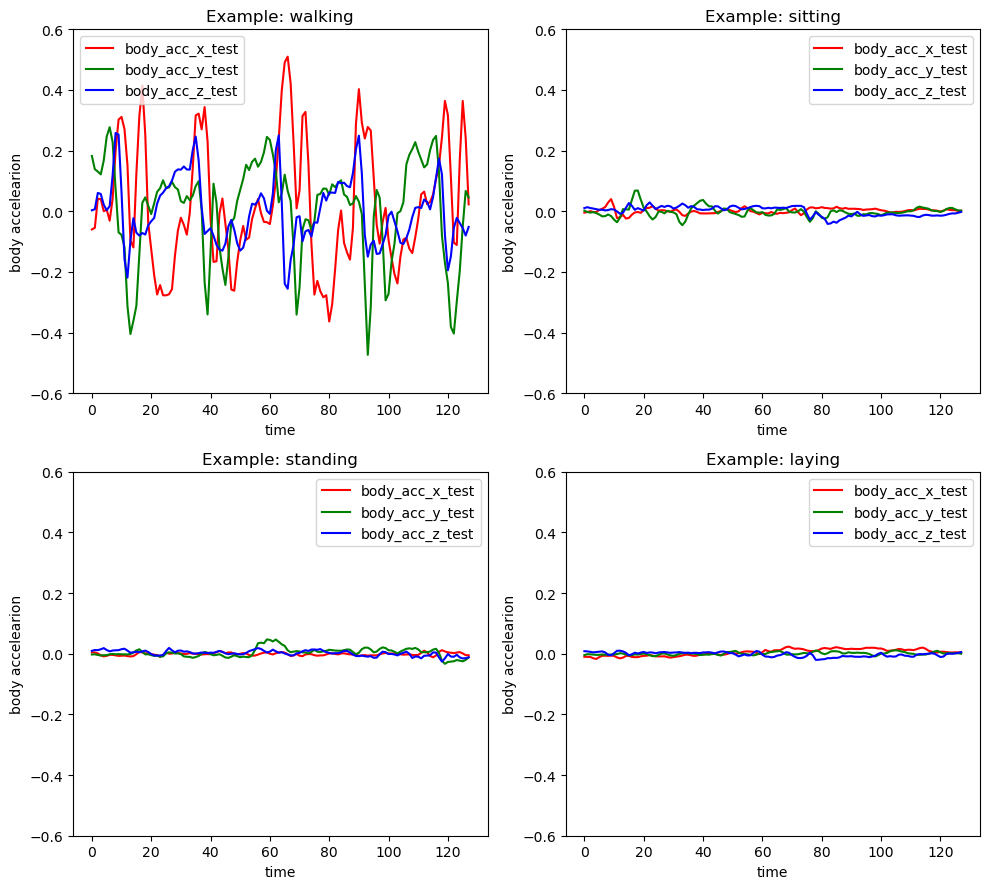

In [17]:
# Plotting examples of activites for body acceleration
fig, axs = plt.subplots(2,2, figsize=(10, 9), tight_layout=True)
fig.subplots_adjust(hspace = .5, wspace=.005)
time_series = np.arange(xtest.shape[1])
axs = axs.ravel()

import itertools
for (i,j,ax) in zip(samples,activity, num):
        axs[ax].plot(time_series, xtest[i, :, 0], color ='red', label='body_acc_x_test')
        axs[ax].plot(time_series, xtest[i, :, 1], color ='green', label='body_acc_y_test')
        axs[ax].plot(time_series, xtest[i, :, 2], color ='blue', label='body_acc_z_test')
        axs[ax].set(title=f'Example: {j}', xlabel='time', ylabel='body accelearion');
        axs[ax].legend()
        axs[ax].set_ylim(-0.6, 0.6)
    
             
plt.show()

#### Split the training data set into two using an 80:20 split, so that you have a train data array and a validation data array

In [10]:
x_input, x_val, y_input, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)
print(xtrain.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(7352, 128, 3)
(2947, 128, 3)
(5881,)
(1471,)


#### You should now create a **single‐layer neural network to classify activities** based on each value of the body acceleration data for the 3 coordinates

In [11]:
#one-hot encoding for labels
y_input = tf.keras.utils.to_categorical(y_input)
y_val = tf.keras.utils.to_categorical(y_val)
print(y_input.shape)
print(y_val.shape)

(5881, 6)
(1471, 6)


In [125]:
#reshaping
x_input = tf.reshape(x_input, (-1,128*3))
print ('X_train samples = ' + str(x_input.shape))

x_val = tf.reshape(x_val, (-1,128*3))
print ('x_val samples = ' + str(x_val.shape))

print ('y_input samples = ' + str(y_input.shape))
print ('y_val samples = ' + str(y_val.shape))

X_train samples = (5881, 384)
x_val samples = (1471, 384)
y_input samples = (5881, 6)
y_val samples = (1471, 6)


In [126]:
#change dtype for consistency
x_input = tf.cast(x_input, dtype=tf.float32)
x_val = tf.cast(x_val, dtype=tf.float32)
y_input = tf.cast(y_input, dtype=tf.float32)
y_val = tf.cast(y_val, dtype=tf.float32)
x_input.dtype

tf.float32

In [127]:
print(xtrain.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(7352, 128, 3)
(2947, 128, 3)
(5881, 6)
(1471, 6)


In [24]:
# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Project'
writer = tf.summary.create_file_writer(logdir)

In [58]:
#Create weight tensors
W = tf.Variable(tf.zeros([384,6]),name='W', dtype=tf.float32)  #weight
b = tf.Variable(tf.zeros([6]),name='b', dtype=tf.float32)   #offset

# #using softmax activation layer on a vector with 6 entries
def y_pred(x):
    return tf.nn.softmax(tf.matmul(x,W) + b)

    
# cross entropy loss function
@tf.function
def loss(x,y):
    y_ = y_pred(x)
    return tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))

#accuracy
def accuracy(x,y):
    y_ = y_pred(x)
    # calculate where the prediction equals the label
    correct = tf.math.equal(tf.math.argmax(y_,axis=-1),tf.math.argmax(y,axis=-1))
    # convert to a float (previously boolean)
    correct = tf.cast(correct,dtype=tf.float32)
    # return the mean to give the overall accuracy
    return tf.math.reduce_mean(correct)

In [59]:
# Selecting training parameters
n_iters = 3000
epochs = range(n_iters)

# learning rate
lr = 0.1

# gradient descent optimizer
optimizer = tf.keras.optimizers.Adam(lr) 


In [60]:
with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            current_loss = loss(x_input, y_input)
        gradients = tape.gradient(current_loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W ,b]))
        tf.summary.scalar('loss', current_loss, step=i)  # write to tensorboard
        train_acc = accuracy(x_input,y_input)
        val_acc = accuracy(X_val,y_val)
        tf.summary.scalar('train_acc', train_acc, step=i)  # write to tensorboard
        tf.summary.scalar('val_acc', val_acc, step=i)  # write to tensorboard
        if i%1000 == 0:
            print('Training Step:' + str(i) + '  Loss = ' + str(current_loss))
        # tf.print('val_acc', val_acc, output_stream=sys.stdout)

#plt.plot(loss_train)
#plt.show()

  0%|          | 0/3000 [00:00<?, ?it/s]

Training Step:0  Loss = tf.Tensor(1.7917595, shape=(), dtype=float32)
Training Step:1000  Loss = tf.Tensor(1.5886203, shape=(), dtype=float32)
Training Step:2000  Loss = tf.Tensor(1.5879076, shape=(), dtype=float32)


## Part 2

In [ ]:
# 1‐dimensional convolutional neural network

Note: Your training data tensors will need to have their original shape of [n,128,3] so make sure to recreate the tensors after
you have completed part 1

In [12]:
#tensorboad set up
logdir = '/home/jovyan/logs/Project'

In [14]:
#Recreate the tensors
x_input, x_val, y_input, y_val = train_test_split(xtrain, ytrain, test_size=0.2, random_state=10)

#one-hot encoding for labels
y_input = tf.keras.utils.to_categorical(y_input)
y_val = tf.keras.utils.to_categorical(y_val)

print(xtrain.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(7352, 128, 3)
(2947, 128, 3)
(5881, 6)
(1471, 6)


In [15]:
# Convert your input and validation data to a tensor so that you can pass it into your classifier
x_input = tf.convert_to_tensor(x_input, tf.float32)
x_val = tf.convert_to_tensor(x_val, tf.float32)
y_input = tf.convert_to_tensor(y_input, tf.float32)
y_val = tf.convert_to_tensor(y_val, tf.float32)
print(xtrain.shape)
print(xtest.shape)
print(y_input.shape)
print(y_val.shape)

(7352, 128, 3)
(2947, 128, 3)
(5881, 6)
(1471, 6)


2023-07-07 15:31:43.923340: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 15:31:44.495214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11560 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


In [17]:
# #Sequential model   (NOT TO USE BUT KEEP)
# model = tf.keras.Sequential(name="model_conv1D")

# model.add(tf.keras.layers.Input(shape=(128,3)))
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation=tf.nn.relu))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.GlobalAveragePooling1D())            ###check
# model.add(tf.keras.layers.Dense(6, activation='softmax'))      #how many units?

In [18]:
# #Compile model

# # Callbacks
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# # create a callback that will stop training if the validation loss hasn't improved for 2 epochs
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
# # initialize tqdm callback with default parameters
# tqdm_callback = tfa.callbacks.TQDMProgressBar()

# # compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
# loss='categorical_crossentropy',           
# metrics=['accuracy'])

# model.summary()

In [19]:
# # TO DO: add tqdm
# # TRAIN lOW FIRST
# # train the model
# fit = model.fit(x_input, y_input, 
#         epochs=500, 
#         verbose=0,  #what does this mean?
#         batch_size=128,
#         callbacks=[tensorboard_callback],
#         validation_data=(x_val, y_val))

# # plt.plot(np.array(fit.history['loss']), "r--", label = "Train loss")
# # plt.plot(np.array(fit.history['accuracy']), "g--", label = "Train accuracy")
# # plt.plot(np.array(fit.history['val_loss']), "r-", label = "Validation loss")
# # plt.plot(np.array(fit.history['val_accuracy']), "g-", label = "Validation accuracy")
# # plt.title("Training session's progress over iterations")
# # plt.legend(loc='lower left')
# # plt.ylabel('Training Progress (Loss/Accuracy)')
# # plt.xlabel('Training Epoch')
# # plt.ylim(0) 
# # plt.show()


In [17]:
# Keras API model

#We create the input layer and combine with further dense layers,
input_layer = tf.keras.Input(shape=(128, 3))
output_layer = tf.keras.layers.Conv1D(filters=32, kernel_size=4)(input_layer)
output_layer = tf.keras.layers.BatchNormalization()(output_layer)
output_layer = tf.keras.layers.Dense(64, activation='relu')(output_layer)
output_layer = tf.keras.layers.GlobalAveragePooling1D()(output_layer)

# # Add a softmax layer with  output units:
output_layer = tf.keras.layers.Dense(6, activation='softmax')(output_layer)


In [18]:
# Compile model

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# create a callback that will stop training if the validation loss hasn't improved for 2 epochs
early_stopping_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

model = tf.keras.Model(inputs=input_layer,outputs=output_layer)

#The compilation and training then proceeds as per the sequential model,
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 3)]          0         
                                                                 
 conv1d (Conv1D)             (None, 125, 32)           416       
                                                                 
 batch_normalization (BatchN  (None, 125, 32)          128       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 125, 64)           2112      
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 6)                 390   

In [19]:
model.fit(x_input, y_input, 
          epochs=100, 
          batch_size=256,
          validation_data=(x_val, y_val),
          callbacks=[tensorboard_callback, tqdm_callback]
         )

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/23           ETA: ?s - 

Epoch 1/100


2023-07-07 15:32:11.097705: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-07-07 15:32:11.329584: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 3.7
2023-07-07 15:32:11.329618: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2023-07-07 15:32:11.329684: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


23/23 [==============================] - 2s 26ms/step - loss: 1.5560 - accuracy: 0.3651 - val_loss: 1.7475 - val_accuracy: 0.3345
Epoch 2/100


0/23           ETA: ?s - 

Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 1.3800 - accuracy: 0.5382 - val_loss: 1.7227 - val_accuracy: 0.2774
Epoch 3/100


0/23           ETA: ?s - 

Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 1.2508 - accuracy: 0.5905 - val_loss: 1.7125 - val_accuracy: 0.1951
Epoch 4/100


0/23           ETA: ?s - 

Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 1.1141 - accuracy: 0.6439 - val_loss: 1.7492 - val_accuracy: 0.1965
Epoch 5/100


0/23           ETA: ?s - 

Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.9819 - accuracy: 0.6955 - val_loss: 1.8631 - val_accuracy: 0.1924
Epoch 6/100


0/23           ETA: ?s - 

Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.8830 - accuracy: 0.6829 - val_loss: 1.9871 - val_accuracy: 0.2148
Epoch 7/100


0/23           ETA: ?s - 

Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.8239 - accuracy: 0.6706 - val_loss: 2.0491 - val_accuracy: 0.2475
Epoch 8/100


0/23           ETA: ?s - 

Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7822 - accuracy: 0.6915 - val_loss: 2.0371 - val_accuracy: 0.2087
Epoch 9/100


0/23           ETA: ?s - 

Epoch 9/100
23/23 [==============================] - 0s 10ms/step - loss: 0.7522 - accuracy: 0.7148 - val_loss: 1.9758 - val_accuracy: 0.2359
Epoch 10/100


0/23           ETA: ?s - 

Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7289 - accuracy: 0.7288 - val_loss: 1.8633 - val_accuracy: 0.2563
Epoch 11/100


0/23           ETA: ?s - 

Epoch 11/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7076 - accuracy: 0.7395 - val_loss: 1.7430 - val_accuracy: 0.3046
Epoch 12/100


0/23           ETA: ?s - 

Epoch 12/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.7332 - val_loss: 1.5919 - val_accuracy: 0.3073
Epoch 13/100


0/23           ETA: ?s - 

Epoch 13/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6769 - accuracy: 0.7327 - val_loss: 1.4376 - val_accuracy: 0.2828
Epoch 14/100


0/23           ETA: ?s - 

Epoch 14/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6652 - accuracy: 0.7376 - val_loss: 1.2883 - val_accuracy: 0.4555
Epoch 15/100


0/23           ETA: ?s - 

Epoch 15/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6537 - accuracy: 0.7567 - val_loss: 1.1425 - val_accuracy: 0.4969
Epoch 16/100


0/23           ETA: ?s - 

Epoch 16/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6427 - accuracy: 0.7523 - val_loss: 1.0019 - val_accuracy: 0.5663
Epoch 17/100


0/23           ETA: ?s - 

Epoch 17/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6342 - accuracy: 0.7670 - val_loss: 0.8935 - val_accuracy: 0.6479
Epoch 18/100


0/23           ETA: ?s - 

Epoch 18/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6264 - accuracy: 0.7487 - val_loss: 0.8178 - val_accuracy: 0.6961
Epoch 19/100


0/23           ETA: ?s - 

Epoch 19/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6194 - accuracy: 0.7591 - val_loss: 0.7534 - val_accuracy: 0.6934
Epoch 20/100


0/23           ETA: ?s - 

Epoch 20/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6114 - accuracy: 0.7669 - val_loss: 0.6986 - val_accuracy: 0.7111
Epoch 21/100


0/23           ETA: ?s - 

Epoch 21/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6044 - accuracy: 0.7701 - val_loss: 0.6693 - val_accuracy: 0.7240
Epoch 22/100


0/23           ETA: ?s - 

Epoch 22/100
23/23 [==============================] - 0s 9ms/step - loss: 0.6003 - accuracy: 0.7490 - val_loss: 0.6412 - val_accuracy: 0.7580
Epoch 23/100


0/23           ETA: ?s - 

Epoch 23/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5928 - accuracy: 0.7708 - val_loss: 0.6225 - val_accuracy: 0.7335
Epoch 24/100


0/23           ETA: ?s - 

Epoch 24/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5863 - accuracy: 0.7645 - val_loss: 0.6108 - val_accuracy: 0.7369
Epoch 25/100


0/23           ETA: ?s - 

Epoch 25/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5813 - accuracy: 0.7771 - val_loss: 0.6001 - val_accuracy: 0.7315
Epoch 26/100


0/23           ETA: ?s - 

Epoch 26/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5773 - accuracy: 0.7754 - val_loss: 0.5832 - val_accuracy: 0.7689
Epoch 27/100


0/23           ETA: ?s - 

Epoch 27/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5702 - accuracy: 0.7783 - val_loss: 0.5761 - val_accuracy: 0.7770
Epoch 28/100


0/23           ETA: ?s - 

Epoch 28/100
23/23 [==============================] - 0s 10ms/step - loss: 0.5674 - accuracy: 0.7776 - val_loss: 0.5728 - val_accuracy: 0.7593
Epoch 29/100


0/23           ETA: ?s - 

Epoch 29/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5619 - accuracy: 0.7903 - val_loss: 0.5610 - val_accuracy: 0.7893
Epoch 30/100


0/23           ETA: ?s - 

Epoch 30/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5579 - accuracy: 0.7825 - val_loss: 0.5587 - val_accuracy: 0.7736
Epoch 31/100


0/23           ETA: ?s - 

Epoch 31/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5532 - accuracy: 0.7970 - val_loss: 0.5528 - val_accuracy: 0.7566
Epoch 32/100


0/23           ETA: ?s - 

Epoch 32/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5493 - accuracy: 0.7932 - val_loss: 0.5457 - val_accuracy: 0.7743
Epoch 33/100


0/23           ETA: ?s - 

Epoch 33/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5467 - accuracy: 0.7929 - val_loss: 0.5482 - val_accuracy: 0.8029
Epoch 34/100


0/23           ETA: ?s - 

Epoch 34/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5421 - accuracy: 0.8053 - val_loss: 0.5390 - val_accuracy: 0.8069
Epoch 35/100


0/23           ETA: ?s - 

Epoch 35/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5401 - accuracy: 0.7885 - val_loss: 0.5427 - val_accuracy: 0.7621
Epoch 36/100


0/23           ETA: ?s - 

Epoch 36/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5356 - accuracy: 0.7958 - val_loss: 0.5343 - val_accuracy: 0.7893
Epoch 37/100


0/23           ETA: ?s - 

Epoch 37/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5323 - accuracy: 0.8051 - val_loss: 0.5335 - val_accuracy: 0.8022
Epoch 38/100


0/23           ETA: ?s - 

Epoch 38/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5281 - accuracy: 0.8031 - val_loss: 0.5308 - val_accuracy: 0.7865
Epoch 39/100


0/23           ETA: ?s - 

Epoch 39/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5254 - accuracy: 0.7992 - val_loss: 0.5230 - val_accuracy: 0.8103
Epoch 40/100


0/23           ETA: ?s - 

Epoch 40/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5228 - accuracy: 0.8039 - val_loss: 0.5181 - val_accuracy: 0.7865
Epoch 41/100


0/23           ETA: ?s - 

Epoch 41/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5192 - accuracy: 0.8031 - val_loss: 0.5123 - val_accuracy: 0.8232
Epoch 42/100


0/23           ETA: ?s - 

Epoch 42/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5164 - accuracy: 0.8169 - val_loss: 0.5153 - val_accuracy: 0.7974
Epoch 43/100


0/23           ETA: ?s - 

Epoch 43/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5135 - accuracy: 0.8029 - val_loss: 0.5077 - val_accuracy: 0.8266
Epoch 44/100


0/23           ETA: ?s - 

Epoch 44/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5116 - accuracy: 0.8133 - val_loss: 0.5081 - val_accuracy: 0.8165
Epoch 45/100


0/23           ETA: ?s - 

Epoch 45/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5078 - accuracy: 0.8012 - val_loss: 0.5110 - val_accuracy: 0.7553
Epoch 46/100


0/23           ETA: ?s - 

Epoch 46/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5072 - accuracy: 0.7903 - val_loss: 0.5076 - val_accuracy: 0.8022
Epoch 47/100


0/23           ETA: ?s - 

Epoch 47/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5067 - accuracy: 0.8043 - val_loss: 0.5113 - val_accuracy: 0.7695
Epoch 48/100


0/23           ETA: ?s - 

Epoch 48/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4998 - accuracy: 0.8113 - val_loss: 0.5077 - val_accuracy: 0.7573
Epoch 49/100


0/23           ETA: ?s - 

Epoch 49/100
23/23 [==============================] - 0s 9ms/step - loss: 0.5000 - accuracy: 0.8109 - val_loss: 0.4989 - val_accuracy: 0.7981
Epoch 50/100


0/23           ETA: ?s - 

Epoch 50/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4960 - accuracy: 0.8172 - val_loss: 0.5003 - val_accuracy: 0.8022
Epoch 51/100


0/23           ETA: ?s - 

Epoch 51/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4942 - accuracy: 0.8192 - val_loss: 0.5029 - val_accuracy: 0.7893
Epoch 52/100


0/23           ETA: ?s - 

Epoch 52/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4935 - accuracy: 0.8220 - val_loss: 0.4924 - val_accuracy: 0.8049
Epoch 53/100


0/23           ETA: ?s - 

Epoch 53/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4899 - accuracy: 0.8240 - val_loss: 0.4895 - val_accuracy: 0.7974
Epoch 54/100


0/23           ETA: ?s - 

Epoch 54/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4903 - accuracy: 0.8223 - val_loss: 0.5030 - val_accuracy: 0.7886
Epoch 55/100


0/23           ETA: ?s - 

Epoch 55/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4893 - accuracy: 0.8152 - val_loss: 0.4895 - val_accuracy: 0.8008
Epoch 56/100


0/23           ETA: ?s - 

Epoch 56/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4846 - accuracy: 0.8175 - val_loss: 0.4842 - val_accuracy: 0.8144
Epoch 57/100


0/23           ETA: ?s - 

Epoch 57/100
23/23 [==============================] - 0s 10ms/step - loss: 0.4823 - accuracy: 0.8175 - val_loss: 0.4825 - val_accuracy: 0.8083
Epoch 58/100


0/23           ETA: ?s - 

Epoch 58/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4827 - accuracy: 0.8228 - val_loss: 0.4800 - val_accuracy: 0.8069
Epoch 59/100


0/23           ETA: ?s - 

Epoch 59/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4788 - accuracy: 0.8147 - val_loss: 0.4766 - val_accuracy: 0.8049
Epoch 60/100


0/23           ETA: ?s - 

Epoch 60/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4779 - accuracy: 0.8167 - val_loss: 0.4861 - val_accuracy: 0.7947
Epoch 61/100


0/23           ETA: ?s - 

Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4764 - accuracy: 0.8215 - val_loss: 0.4761 - val_accuracy: 0.7961
Epoch 62/100


0/23           ETA: ?s - 

Epoch 62/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4753 - accuracy: 0.8243 - val_loss: 0.4757 - val_accuracy: 0.7859
Epoch 63/100


0/23           ETA: ?s - 

Epoch 63/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4754 - accuracy: 0.8107 - val_loss: 0.4728 - val_accuracy: 0.8035
Epoch 64/100


0/23           ETA: ?s - 

Epoch 64/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4733 - accuracy: 0.8177 - val_loss: 0.4776 - val_accuracy: 0.8382
Epoch 65/100


0/23           ETA: ?s - 

Epoch 65/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4714 - accuracy: 0.8215 - val_loss: 0.4665 - val_accuracy: 0.8212
Epoch 66/100


0/23           ETA: ?s - 

Epoch 66/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4661 - accuracy: 0.8356 - val_loss: 0.4636 - val_accuracy: 0.8260
Epoch 67/100


0/23           ETA: ?s - 

Epoch 67/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4661 - accuracy: 0.8271 - val_loss: 0.4616 - val_accuracy: 0.8103
Epoch 68/100


0/23           ETA: ?s - 

Epoch 68/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4633 - accuracy: 0.8245 - val_loss: 0.4682 - val_accuracy: 0.8103
Epoch 69/100


0/23           ETA: ?s - 

Epoch 69/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4636 - accuracy: 0.8240 - val_loss: 0.4623 - val_accuracy: 0.8103
Epoch 70/100


0/23           ETA: ?s - 

Epoch 70/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4638 - accuracy: 0.8240 - val_loss: 0.4621 - val_accuracy: 0.8219
Epoch 71/100


0/23           ETA: ?s - 

Epoch 71/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4600 - accuracy: 0.8317 - val_loss: 0.4591 - val_accuracy: 0.8137
Epoch 72/100


0/23           ETA: ?s - 

Epoch 72/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4571 - accuracy: 0.8240 - val_loss: 0.4648 - val_accuracy: 0.8239
Epoch 73/100


0/23           ETA: ?s - 

Epoch 73/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4583 - accuracy: 0.8279 - val_loss: 0.4625 - val_accuracy: 0.8056
Epoch 74/100


0/23           ETA: ?s - 

Epoch 74/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4582 - accuracy: 0.8201 - val_loss: 0.4592 - val_accuracy: 0.8396
Epoch 75/100


0/23           ETA: ?s - 

Epoch 75/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4569 - accuracy: 0.8160 - val_loss: 0.4531 - val_accuracy: 0.8219
Epoch 76/100


0/23           ETA: ?s - 

Epoch 76/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4529 - accuracy: 0.8313 - val_loss: 0.4558 - val_accuracy: 0.8137
Epoch 77/100


0/23           ETA: ?s - 

Epoch 77/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4525 - accuracy: 0.8269 - val_loss: 0.4554 - val_accuracy: 0.8178
Epoch 78/100


0/23           ETA: ?s - 

Epoch 78/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4501 - accuracy: 0.8357 - val_loss: 0.4605 - val_accuracy: 0.8280
Epoch 79/100


0/23           ETA: ?s - 

Epoch 79/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4514 - accuracy: 0.8220 - val_loss: 0.4533 - val_accuracy: 0.8212
Epoch 80/100


0/23           ETA: ?s - 

Epoch 80/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4466 - accuracy: 0.8344 - val_loss: 0.4590 - val_accuracy: 0.8042
Epoch 81/100


0/23           ETA: ?s - 

Epoch 81/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4455 - accuracy: 0.8255 - val_loss: 0.4530 - val_accuracy: 0.7947
Epoch 82/100


0/23           ETA: ?s - 

Epoch 82/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4462 - accuracy: 0.8276 - val_loss: 0.4533 - val_accuracy: 0.8171
Epoch 83/100


0/23           ETA: ?s - 

Epoch 83/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4471 - accuracy: 0.8267 - val_loss: 0.4479 - val_accuracy: 0.7940
Epoch 84/100


0/23           ETA: ?s - 

Epoch 84/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4426 - accuracy: 0.8296 - val_loss: 0.4469 - val_accuracy: 0.8396
Epoch 85/100


0/23           ETA: ?s - 

Epoch 85/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4446 - accuracy: 0.8317 - val_loss: 0.4436 - val_accuracy: 0.8300
Epoch 86/100


0/23           ETA: ?s - 

Epoch 86/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4419 - accuracy: 0.8259 - val_loss: 0.4470 - val_accuracy: 0.8307
Epoch 87/100


0/23           ETA: ?s - 

Epoch 87/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4395 - accuracy: 0.8312 - val_loss: 0.4539 - val_accuracy: 0.8300
Epoch 88/100


0/23           ETA: ?s - 

Epoch 88/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4391 - accuracy: 0.8298 - val_loss: 0.4566 - val_accuracy: 0.8090
Epoch 89/100


0/23           ETA: ?s - 

Epoch 89/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4394 - accuracy: 0.8378 - val_loss: 0.4618 - val_accuracy: 0.8199
Epoch 90/100


0/23           ETA: ?s - 

Epoch 90/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4407 - accuracy: 0.8288 - val_loss: 0.4578 - val_accuracy: 0.7845
Epoch 91/100


0/23           ETA: ?s - 

Epoch 91/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4387 - accuracy: 0.8237 - val_loss: 0.4546 - val_accuracy: 0.7967
Epoch 92/100


0/23           ETA: ?s - 

Epoch 92/100
23/23 [==============================] - 0s 10ms/step - loss: 0.4352 - accuracy: 0.8364 - val_loss: 0.4412 - val_accuracy: 0.8239
Epoch 93/100


0/23           ETA: ?s - 

Epoch 93/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4334 - accuracy: 0.8349 - val_loss: 0.4391 - val_accuracy: 0.8117
Epoch 94/100


0/23           ETA: ?s - 

Epoch 94/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4316 - accuracy: 0.8320 - val_loss: 0.4475 - val_accuracy: 0.8008
Epoch 95/100


0/23           ETA: ?s - 

Epoch 95/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4300 - accuracy: 0.8381 - val_loss: 0.4415 - val_accuracy: 0.8192
Epoch 96/100


0/23           ETA: ?s - 

Epoch 96/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4302 - accuracy: 0.8312 - val_loss: 0.4373 - val_accuracy: 0.8212
Epoch 97/100


0/23           ETA: ?s - 

Epoch 97/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4308 - accuracy: 0.8374 - val_loss: 0.4339 - val_accuracy: 0.8368
Epoch 98/100


0/23           ETA: ?s - 

Epoch 98/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4291 - accuracy: 0.8352 - val_loss: 0.4451 - val_accuracy: 0.8049
Epoch 99/100


0/23           ETA: ?s - 

Epoch 99/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4292 - accuracy: 0.8315 - val_loss: 0.4336 - val_accuracy: 0.7940
Epoch 100/100


0/23           ETA: ?s - 

Epoch 100/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4270 - accuracy: 0.8332 - val_loss: 0.4449 - val_accuracy: 0.8260


In [130]:
predictions = model.predict(x_input,verbose=0)
y_pred = np.argmax(predictions,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_input[:,0])/len(y_input))

train accuracy:  0.0017003910899506887


In [131]:
predictions = model.predict(X_val,verbose=0)
y_pred = np.argmax(predictions,axis=-1)
print('val accuracy: ', np.sum(y_pred==y_val[:,0])/len(y_val))

val accuracy:  0.002719238613188307


In [40]:
##LSTM##
# https://www.analyticsvidhya.com/blog/2021/07/implementing-lstm-for-human-activity-recognition-using-smartphone-accelerometer-data/

from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (x_input.shape[1], x_input.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 124, activation='relu'))
# Softmax layer
model.add(Dense(y_input.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 124)               15996     
                                                                 
 dense_9 (Dense)             (None, 6)                 750       
                                                                 
Total params: 84,330
Trainable params: 84,330
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
5/5 [==============================] - 3s 275ms/step - loss: 1.7873 - accuracy: 0.2436 - val_loss: 1.7783 - val_accuracy: 0.2608
Epoch 2/100
5/5 [==============================] - 0s 96ms/step - loss: 1.7750 - accuracy: 0.2766 - val_loss: 1.7637 - val_accuracy: 0.2753
Epoch 3/100
5/5 [==============================] - 0s 94ms/step - loss: 1.7577 - accuracy: 0.3074 - val_loss: 1.7307 - val_accuracy: 0.3602
Epoch 4/100
5/5 [==============================] - 0s 92ms/step - loss: 1.7010 - accuracy: 0.3659 - val_loss: 1.5927 - val_accuracy: 0.3347
Epoch 5/100
5/5 [==============================] - 0s 93ms/step - loss: 1.5730 - accuracy: 0.3274 - val_loss: 1.4868 - val_accuracy: 0.3560
Epoch 6/100
5/5 [==============================] - 0s 98ms/step - loss: 1.4442 - accuracy: 0.3403 - val_loss: 1.2576 - val_accuracy: 0.3500
Epoch 7/100
5/5 [==============================] - 0s 90ms/step - loss: 1.2588 - accuracy: 0.3395 - val_loss: 1.1628 - val_accuracy: 0.3543
Epoch 8/100
5/5 [==

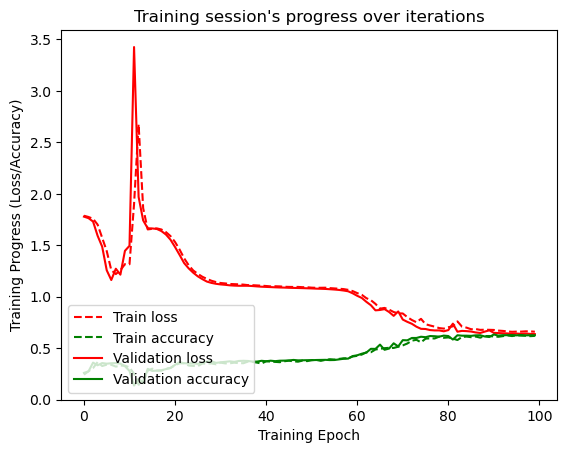

In [41]:
n_epochs = 100
batch_size = 1024 

history = model.fit(x_input, y_input, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()